In [5]:
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os, sys, json
import pandas as pd

In [13]:
results = {}
for i in sorted(glob('5/*/M-M-CZ_HWE-CNOT/M-M-CZ_HWE-CNOT_results.json')):
    with open(i,'r') as f:
        results[os.path.basename(os.path.dirname(os.path.dirname(i)))]=json.load(f)

In [17]:
r_df = pd.DataFrame(results).drop(index=['MSE_train','MSE_test'])

In [19]:
help(pd.melt)

Help on function melt in module pandas.core.reshape.melt:

melt(frame: 'DataFrame', id_vars=None, value_vars=None, var_name=None, value_name: 'Hashable' = 'value', col_level=None, ignore_index: 'bool' = True) -> 'DataFrame'
    Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.

    This function is useful to massage a DataFrame into a format where one
    or more columns are identifier variables (`id_vars`), while all other
    columns, considered measured variables (`value_vars`), are "unpivoted" to
    the row axis, leaving just two non-identifier columns, 'variable' and
    'value'.

    Parameters
    ----------
    id_vars : scalar, tuple, list, or ndarray, optional
        Column(s) to use as identifier variables.
    value_vars : scalar, tuple, list, or ndarray, optional
        Column(s) to unpivot. If not specified, uses all columns that
        are not set as `id_vars`.
    var_name : scalar, default None
        Name to use for the 'variable' 

<Axes: xlabel='index', ylabel='value'>

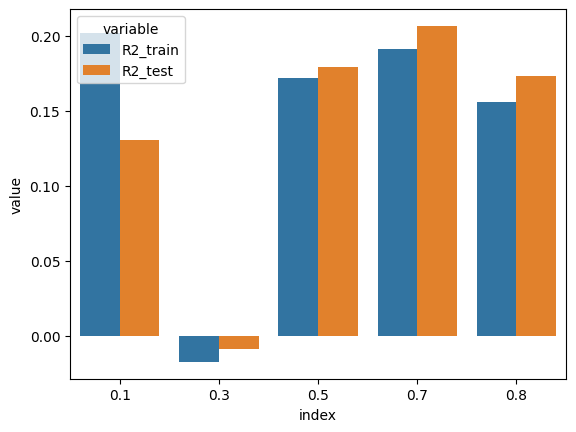

In [30]:
sns.barplot(data=r_df.T[['R2_train','R2_test']].reset_index().melt(id_vars=['index'], value_vars=['R2_train','R2_test']),x='index',y='value',hue='variable')